### Step 1: Load the Dataset

In [ ]:
import pandas as pd
import os
root_path = 'C:\\Users\\user\\Desktop\\Task'
file_path = os.path.join(root_path, 'Test data.xlsx')

df = pd.read_excel(file_path, sheet_name='Sheet1')
df.head()

,Order ID,Region,Product Category,Sales Amount,Cost,Profit,Order Date,Customer Segment,Unnamed: 8,Data Summarization:,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1001.0,North,Electronics,1500.0,1000.0,500.0,2023-06-01,Corporate,NaN,"1- Summarize the total sales, total profit, an...",NaN,NaN,NaN,NaN
1,1002.0,South,Furniture,800.0,600.0,200.0,2023-06-03,Small Business,NaN,Region,Total Sales,Total Profit,Average Sales,Column1
2,1003.0,East,Electronics,1200.0,900.0,300.0,2023-06-05,Corporate,NaN,North,4800,1350,1200,5137.5
3,1004.0,West,Office Supplies,600.0,450.0,150.0,2023-06-10,Consumer,NaN,West,4100,950,1366.67,4337.5
4,1005.0,North,Furniture,500.0,300.0,200.0,2023-06-12,Consumer,NaN,South,3700,800,1233.33,3900


### Step 2: Data Understanding and Cleaning

###### Drop Unnecessary Columns

In [ ]:
# Keep only essential columns
df = df[['Order ID', 'Region', 'Product Category', 'Sales Amount', 'Cost', 'Profit', 'Order Date', 'Customer Segment']]

###### Check for Missing Values

In [ ]:
# Check for missing values
print(df.isnull().sum())

Order ID            61
Region              61
Product Category    61
Sales Amount        61
Cost                61
Profit              61
Order Date          61
Customer Segment    61
dtype: int64


###### Handle Outliers

In [ ]:
# basic statistics
print(df.describe())

         Order ID  Sales Amount         Cost      Profit  Unnamed: 8
count    13.00000     13.000000    13.000000   13.000000         0.0
mean   1007.00000   1215.384615   907.692308  307.692308         NaN
std       3.89444    582.875278   458.642087  139.711241         NaN
min    1001.00000    500.000000   300.000000  150.000000         NaN
25%    1004.00000    800.000000   600.000000  200.000000         NaN
50%    1007.00000   1100.000000   850.000000  250.000000         NaN
75%    1010.00000   1500.000000  1000.000000  400.000000         NaN
max    1013.00000   2500.000000  1900.000000  600.000000         NaN


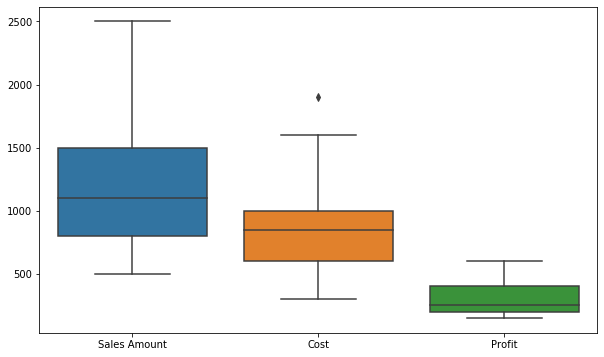

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Sales Amount', 'Cost', 'Profit']])
plt.show()

### Step 3: Data Summarization

###### Total Sales, Profit, and Average Sales by Region
###### Summarize key metrics by region.

In [ ]:
region_summary = df.groupby('Region').agg(
    total_sales=('Sales Amount', 'sum'),
    total_profit=('Profit', 'sum'),
    average_sales=('Sales Amount', 'mean')
)
print(region_summary)

        total_sales  total_profit  average_sales
Region                                          
East         3200.0         900.0    1066.666667
North        4800.0        1350.0    1200.000000
South        3700.0         800.0    1233.333333
West         4100.0         950.0    1366.666667


###### Total Sales and Profit by Product Category
###### Summarize sales and profit by product category.

In [ ]:
category_summary = df.groupby('Product Category').agg(
    total_sales=('Sales Amount', 'sum'),
    total_profit=('Profit', 'sum')
)
print(category_summary)

                  total_sales  total_profit
Product Category                           
Electronics            8900.0        2200.0
Furniture              3600.0        1000.0
Office Supplies        3300.0         800.0


###### Calculate Profit Margin
###### Profit margin for each order is calculated as Profit / Sales Amount.

In [ ]:
df['Profit Margin'] = df['Profit'] / df['Sales Amount']

average_profit_margin = df['Profit Margin'].mean()
print(f"Overall Average Profit Margin: {average_profit_margin}")

Overall Average Profit Margin: 0.2616560764524566


### Step 4: Trend Analysis

###### Sales Trends by Customer Segment
###### Analyze which customer segment contributes most to sales and profit.

In [ ]:
segment_summary = df.groupby('Customer Segment').agg(
    total_sales=('Sales Amount', 'sum'),
    total_profit=('Profit', 'sum')
)
print(segment_summary)

                  total_sales  total_profit
Customer Segment                           
Consumer               4600.0        1150.0
Corporate              7500.0        2050.0
Small Business         3700.0         800.0


###### Monthly Sales Trends

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

monthly_sales = df.groupby(['Year', 'Month'])['Sales Amount'].sum()
print(monthly_sales)

Year    Month
2023.0  6.0      13300.0
        7.0       2500.0
Name: Sales Amount, dtype: float64


### Step 5: Insights and Recommendations

The region which is the top performer in terms of Total Sales and Profit

In [ ]:
top_region_sales = region_summary.sort_values(by='total_sales', ascending=False).head(1)
top_region_profit = region_summary.sort_values(by='total_profit', ascending=False).head(1)

print("Top Region by Sales:")
print(top_region_sales)

print("\nTop Region by Profit:")
print(top_region_profit)


Top Region by Sales:
        total_sales  total_profit  average_sales
Region                                          
North        4800.0        1350.0         1200.0

Top Region by Profit:
        total_sales  total_profit  average_sales
Region                                          
North        4800.0        1350.0         1200.0


The Product Category which has the highest Sales and Profit margin

In [ ]:
category_summary['Profit Margin'] = category_summary['total_profit'] / category_summary['total_sales']

top_category_sales = category_summary.sort_values(by='total_sales', ascending=False).head(1)
top_category_margin = category_summary.sort_values(by='Profit Margin', ascending=False).head(1)

print("Top Product Category by Sales:")
print(top_category_sales)

print("\nTop Product Category by Profit Margin:")
print(top_category_margin)


Top Product Category by Sales:
                  total_sales  total_profit  Profit Margin
Product Category                                          
Electronics            8900.0        2200.0       0.247191

Top Product Category by Profit Margin:
                  total_sales  total_profit  Profit Margin
Product Category                                          
Furniture              3600.0        1000.0       0.277778


The customer segment which is the Most Profitable

In [18]:
top_segment_profit = segment_summary.sort_values(by='total_profit', ascending=False).head(1)

print("Most Profitable Customer Segment:")
print(top_segment_profit)


Most Profitable Customer Segment:
                  total_sales  total_profit
Customer Segment                           
Corporate              7500.0        2050.0


In [19]:
# Underperforming regions by total sales and profit
underperforming_regions = region_summary.sort_values(by='total_sales').head(1)

# Underperforming product categories by total sales and profit
underperforming_categories = category_summary.sort_values(by='total_sales').head(1)

print("Underperforming Region(s):")
print(underperforming_regions)

print("\nUnderperforming Product Category(s):")
print(underperforming_categories)


Underperforming Region(s):
        total_sales  total_profit  average_sales
Region                                          
East         3200.0         900.0    1066.666667

Underperforming Product Category(s):
                  total_sales  total_profit  Profit Margin
Product Category                                          
Office Supplies        3300.0         800.0       0.242424


### Recommendations

###### Top-Performing Region: Continue investing in the top-performing region by increasing stock availability and supporting local promotions. Additionally, allocate more budget for regional marketing to strengthen customer loyalty and capture more market share. If the region is showing consistent growth, consider opening new distribution centers or retail outlets to meet demand.

###### Product Category with Highest Sales: Since this category generates the most revenue, increase inventory and focus on optimizing the supply chain for faster restocking. Launch targeted campaigns to upsell and cross-sell related products, as this category likely has high customer demand.

###### Product Category with the Highest Profit Margin: Prioritize this category for high-profit campaigns. Offer value-added services, such as extended warranties or premium packaging, to attract high-margin buyers. Also, consider raising prices gradually if competitive dynamics allow, to enhance profitability.

###### Most Profitable Customer Segment: Develop targeted marketing strategies for the most profitable customer segment, including exclusive promotions, loyalty rewards, and customized product recommendations. This could involve creating dedicated email campaigns, special discounts, or tailored bundles to encourage repeat purchases and enhance lifetime customer value.

###### Underperforming Regions: Evaluate potential challenges in the underperforming regions, such as lower brand awareness or logistical issues. Implement localized marketing initiatives, such as discount events or partnerships with local businesses, to increase visibility. Consider adjusting product offerings or pricing to better match local demand and preferences.

###### Underperforming Product Categories: Identify why these categories are underperforming—whether due to low demand, high competition, or limited marketing support. Run trial promotions, bundle products to increase appeal, or create educational content to highlight product benefits. If demand remains low, consider reducing inventory for these categories or discontinuing them to free up resources for more profitable items.

### Strategic Actions
###### Invest in High-Performing Areas: Allocate resources to enhance operations in regions and categories with the strongest sales and profit margins.
###### Focus on High-Profit Customer Segments: Develop a customer loyalty program for high-profit segments to encourage repeat purchases.
###### Enhance Market Penetration in Lower-Performing Regions and Categories: Use a data-driven approach to target areas of improvement, focusing on adjusting inventory, pricing, and local advertising for better alignment with market demand.